In [17]:
import pandas as pd

def convert_ms_to_int(e):
    return int(e[:-2])

data = pd.read_csv("cleaned_data.csv")
data = data[data["throttleType"] == "delay"]

In [18]:
# delay_data = data[['throttleparameter', 'speed-index_numericValue', 'speed-index_score', 'lighthouse_performance', 'httpVersion', 'ttfb_mean', 'domComplete_mean', 'fullyLoaded_mean', 'firstPaint_mean']]
delay_data = data
delay_data['throttleparameter'] = delay_data['throttleparameter'].apply(convert_ms_to_int)
delay_data.sort_values(by=['throttleparameter'], inplace=True)

delay_data

,Unnamed: 0,timestamp,url,profile,domElements_median,domElements_mean,domElements_min,domElements_max,ttfb_median,ttfb_mean,...,first-contentful-paint_score,first-contentful-paint_numericValue,largest-contentful-paint_score,largest-contentful-paint_numericValue,speed-index_score,speed-index_numericValue,total-blocking-time_score,total-blocking-time_numericValue,cumulative-layout-shift_score,cumulative-layout-shift_numericValue
272,0,2021-11-16T18:35:53+00:00,https://www.youtube.com/,3g,9387,9381,9347,9408,67,77,...,0.13,4668.788,0.01,8927.9480,0.61,5185.839000,0.38,784.1740,1.00,0.006708
273,0,2021-11-16T18:30:15+00:00,https://www.google.com/,3g,215,213,210,215,98,97,...,0.87,1903.280,0.98,1903.2800,0.97,2676.355000,0.35,841.0000,0.99,0.047766
271,0,2021-11-16T18:32:50+00:00,https://www.facebook.com/,3g,259,258,256,259,271,270,...,0.26,3861.406,0.54,3861.4060,0.83,3861.406000,1.00,0.0000,1.00,0.027562
150,0,2021-11-15T05:21:28+00:00,https://www.whatsapp.com/,3g,560,560,560,560,446,447,...,0.63,2628.893,0.37,4513.4555,0.97,2628.893000,1.00,0.0000,1.00,0.013755
183,0,2021-11-15T05:22:50+00:00,https://www.whatsapp.com/,3g,560,560,560,560,439,438,...,0.67,2513.652,0.53,3898.7430,0.98,2513.652000,1.00,0.0000,1.00,0.013755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,2021-11-15T08:55:51+00:00,https://www.canva.com/,3g,4254,4254,4254,4254,607,759,...,0.69,2455.440,0.55,3802.4400,0.35,6839.362166,0.02,3229.9335,1.00,0.000966
180,0,2021-11-15T09:01:15+00:00,https://www.whatsapp.com/,3g,560,560,560,560,486,556,...,0.63,2626.462,0.51,3970.1540,0.97,2626.462000,1.00,0.0000,1.00,0.013755
257,0,2021-11-16T21:02:48+00:00,https://www.youtube.com/,3g,9379,9366,9328,9390,60,63,...,0.13,4666.426,0.03,8086.5270,0.62,5115.887000,0.49,617.4810,1.00,0.016727
201,0,2021-11-16T20:58:29+00:00,https://www.facebook.com/,3g,259,259,259,259,282,287,...,0.27,3833.955,0.55,3833.9550,0.84,3833.955000,1.00,0.0000,1.00,0.027562


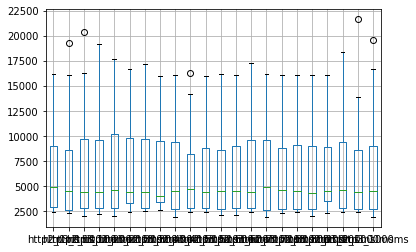

In [64]:
#Ignore this useless cell, thanks
#Seaborn is superior to matplotlib

def boxplot(field, data):
    selected = {}

    for i in range(0, 1100, 100):
        parameter = str(i) + "ms"

        http2_data = data[(data['throttleparameter'] == parameter) & (data['httpVersion'] == 2)][field]
        http3_data = data[(data['throttleparameter'] == parameter) & (data['httpVersion'] == 3)][field]
        selected['http2_' + parameter] = http2_data
        selected['http3_' + parameter] = http3_data

    boxplot_df = pd.DataFrame(selected)
    boxplot_df.boxplot()

boxplot('speed-index_numericValue', data)

<AxesSubplot:xlabel='throttleparameter', ylabel='speed-index_numericValue'>

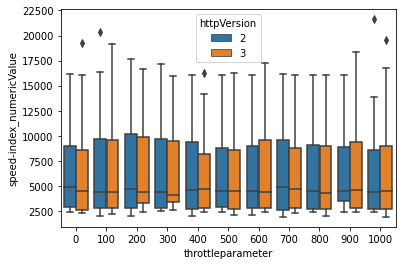

In [19]:
import seaborn as sns

sns.boxplot(x="throttleparameter", y="speed-index_numericValue", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='speed-index_score'>

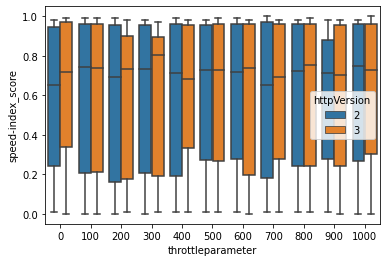

In [20]:
sns.boxplot(x="throttleparameter", y="speed-index_score", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='lighthouse_performance'>

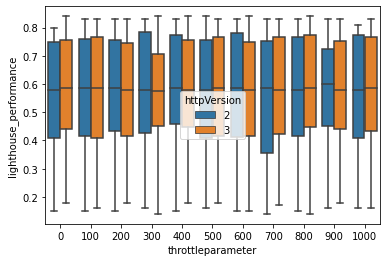

In [21]:
sns.boxplot(x="throttleparameter", y="lighthouse_performance", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='ttfb_mean'>

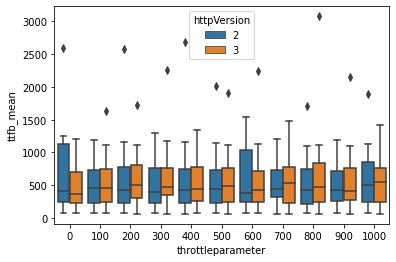

In [22]:
sns.boxplot(x="throttleparameter", y="ttfb_mean", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='domComplete_mean'>

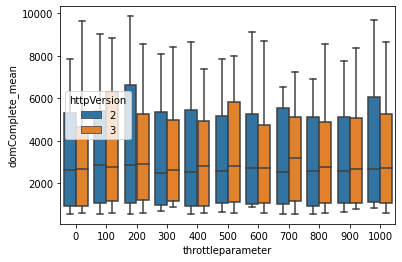

In [23]:
sns.boxplot(x="throttleparameter", y="domComplete_mean", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='fullyLoaded_mean'>

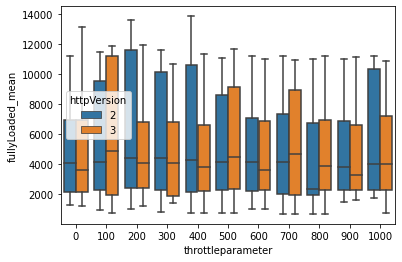

In [24]:
sns.boxplot(x="throttleparameter", y="fullyLoaded_mean", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='fullyLoaded_mean'>

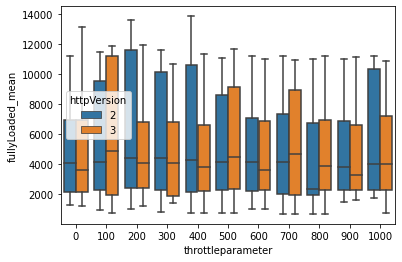

In [25]:
sns.boxplot(x="throttleparameter", y="fullyLoaded_mean", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='cumulative-layout-shift_score'>

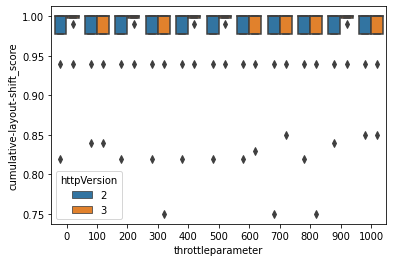

In [26]:
sns.boxplot(x="throttleparameter", y="cumulative-layout-shift_score", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='total-blocking-time_score'>

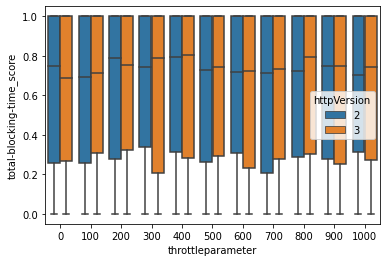

In [27]:
sns.boxplot(x="throttleparameter", y="total-blocking-time_score", hue="httpVersion", data=delay_data)